In [1]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular
from py_ballisticcalc import DragModel, TableG7
from py_ballisticcalc import Ammo
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

In [2]:
# Define standard .308
dm = DragModel(0.22, TableG7, 168, 0.308)
ammo = Ammo(dm, 1.22, Velocity(2600, Velocity.FPS))
weapon = Weapon(4, 12)

# Establish 100-yard zero
calc = Calculator(weapon, ammo)
zero_elevation = calc.set_weapon_zero(Distance.Yard(100))
print(f'Barrel elevation for zero: {zero_elevation << Angular.MOA}')

Barrel elevation for zero: 6.41moa


ext True
Danger space at 300.0yd for 50.0cm tall target ranges from 187.533yd to 361.7yd


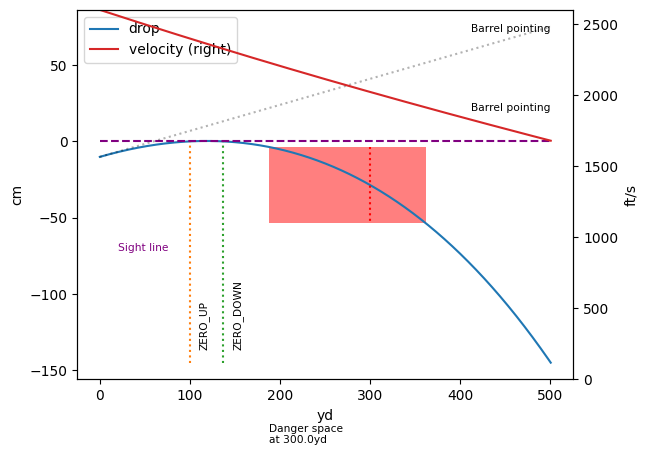

In [3]:
# Plot trajectory out to 500 yards
shot = Shot(weapon = weapon)
shot_result = calc.fire(shot, trajectory_range=500, extra_data=True)
ax = shot_result.plot()
# Find danger space for a half-meter tall target at 300 yards
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), Angular.Mil(0))
print(danger_space)
# Highlight danger space on the plot
danger_space.overlay(ax)
plt.show()

In [4]:
# Now find the elevation needed to hit a target at 200 yards with 10-degree look angle
# Establish 100-yard zero
look = Angular.Degree(10)
target = Distance.Yard(200)
zero_elevation = calc.set_weapon_zero(target, look)
print(f'To hit target at {target << Set.Units.distance} sighted at a ' 
      f'{look << Angular.Degree} look angle, zero elevation={zero_elevation << Angular.MOA}')

To hit target at 200.0yd sighted at a 10.0° look angle, zero elevation=7.34moa


ext True
Danger space at 300.0yd for 50.0cm tall target ranges from 164.667yd to 362.433yd


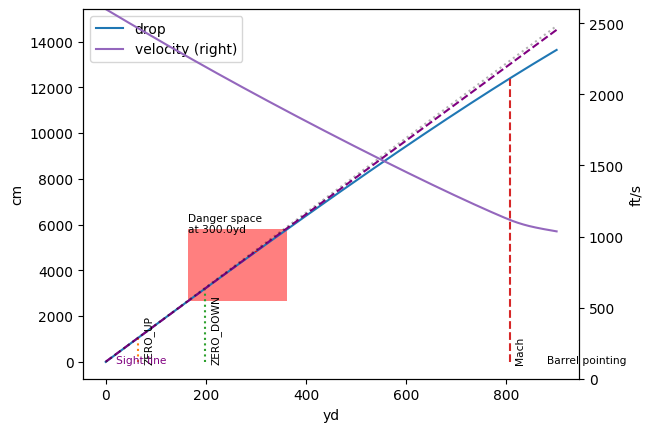

In [5]:
shot_result = calc.fire(Shot(weapon=weapon, look_angle=look), trajectory_range=900, extra_data=True)
ax = shot_result.plot()
# Find danger space for a target
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), look)
print(danger_space)
# Highlight danger space on the plot
danger_space.overlay(ax)
plt.show()

In [6]:
shot_result.dataframe.to_clipboard()

In [4]:
# Now shooter prints range card for 200-yard zero
calc.set_weapon_zero(Distance.Yard(200))
shot_result = calc.fire(Shot(weapon=weapon), trajectory_range=1000, trajectory_step=100)
for p in shot_result:
    print(p.formatted())

('0.00 s', '0.000 yd', '2600.0 ft/s', '2.33 mach', '-10.160 cm', '0.00 mil', '0.000 cm', '0.00 mil', '0.1233 °', '3419 J', '744.098 lb', 8)
('0.12 s', '100.000 yd', '2398.1 ft/s', '2.15 mach', '2.615 cm', '0.29 mil', '-0.189 cm', '-0.02 mil', '0.0345 °', '2908 J', '583.865 lb', 8)
('0.25 s', '200.050 yd', '2205.4 ft/s', '1.98 mach', '-0.006 cm', '-0.00 mil', '-0.726 cm', '-0.04 mil', '-0.0702 °', '2460 J', '454.104 lb', 8)
('0.39 s', '300.050 yd', '2022.2 ft/s', '1.81 mach', '-20.828 cm', '-0.77 mil', '-1.652 cm', '-0.06 mil', '-0.1943 °', '2068 J', '350.103 lb', 8)
('0.55 s', '400.050 yd', '1847.5 ft/s', '1.65 mach', '-63.303 cm', '-1.76 mil', '-3.038 cm', '-0.08 mil', '-0.3424 °', '1726 J', '266.954 lb', 8)
('0.72 s', '500.000 yd', '1680.1 ft/s', '1.50 mach', '-131.691 cm', '-2.93 mil', '-4.984 cm', '-0.11 mil', '-0.5206 °', '1428 J', '200.776 lb', 8)
('0.91 s', '600.000 yd', '1519.5 ft/s', '1.36 mach', '-231.504 cm', '-4.30 mil', '-7.623 cm', '-0.14 mil', '-0.7374 °', '1168 J', '148

In [5]:
# Referencing the above table, shooter dials +2.93mil for a 500-yard shot
shot_result = calc.fire(Shot(weapon=weapon, relative_angle=Angular.Mil(2.93)), trajectory_range=1000, trajectory_step=100)
for p in shot_result:
    print(p.formatted())

('0.00 s', '0.000 yd', '2600.0 ft/s', '2.33 mach', '-10.160 cm', '0.00 mil', '0.000 cm', '0.00 mil', '0.2881 °', '3419 J', '744.098 lb', 8)
('0.12 s', '100.000 yd', '2398.1 ft/s', '2.15 mach', '28.917 cm', '3.22 mil', '-0.189 cm', '-0.02 mil', '0.1993 °', '2908 J', '583.856 lb', 8)
('0.25 s', '200.050 yd', '2205.3 ft/s', '1.98 mach', '52.611 cm', '2.93 mil', '-0.726 cm', '-0.04 mil', '0.0946 °', '2460 J', '454.089 lb', 8)
('0.39 s', '300.050 yd', '2022.2 ft/s', '1.81 mach', '58.090 cm', '2.16 mil', '-1.652 cm', '-0.06 mil', '-0.0295 °', '2068 J', '350.085 lb', 8)
('0.55 s', '400.050 yd', '1847.4 ft/s', '1.65 mach', '41.915 cm', '1.17 mil', '-3.038 cm', '-0.08 mil', '-0.1776 °', '1726 J', '266.933 lb', 8)
('0.72 s', '500.000 yd', '1680.0 ft/s', '1.50 mach', '-0.185 cm', '-0.00 mil', '-4.984 cm', '-0.11 mil', '-0.3558 °', '1427 J', '200.756 lb', 8)
('0.91 s', '600.000 yd', '1519.4 ft/s', '1.36 mach', '-73.699 cm', '-1.37 mil', '-7.624 cm', '-0.14 mil', '-0.5726 °', '1168 J', '148.506 lb'